## Przygotowanie danych

In [2]:
from sklearn import datasets

data_breast_cancer = datasets.load_breast_cancer()
data_iris = datasets.load_iris()
X_cancer, y_cancer = data_breast_cancer["data"], data_breast_cancer["target"]
X_iris, y_iris = data_iris["data"], data_iris["target"]

## ćwiczenia

Przeprowadź analizę PCA, tak aby tak zredukować liczbę wymiarów dla każdego z w/w
zbiorów. Nowa przestrzeń ma pokrywać przynajmniej 90% różnorodności (zmienności) danych
i ma mieć jak najmniej wymiarów

In [3]:
from sklearn.decomposition import PCA

pca_cancer = PCA(n_components=.9)
X_cancer_pca = pca_cancer.fit_transform(X_cancer, y_cancer)

In [4]:
pca_iris = PCA(n_components=.9)
X_iris_pca = pca_iris.fit_transform(X_iris, y_iris)
X_iris_pca

array([[-2.68412563],
       [-2.71414169],
       [-2.88899057],
       [-2.74534286],
       [-2.72871654],
       [-2.28085963],
       [-2.82053775],
       [-2.62614497],
       [-2.88638273],
       [-2.6727558 ],
       [-2.50694709],
       [-2.61275523],
       [-2.78610927],
       [-3.22380374],
       [-2.64475039],
       [-2.38603903],
       [-2.62352788],
       [-2.64829671],
       [-2.19982032],
       [-2.5879864 ],
       [-2.31025622],
       [-2.54370523],
       [-3.21593942],
       [-2.30273318],
       [-2.35575405],
       [-2.50666891],
       [-2.46882007],
       [-2.56231991],
       [-2.63953472],
       [-2.63198939],
       [-2.58739848],
       [-2.4099325 ],
       [-2.64886233],
       [-2.59873675],
       [-2.63692688],
       [-2.86624165],
       [-2.62523805],
       [-2.80068412],
       [-2.98050204],
       [-2.59000631],
       [-2.77010243],
       [-2.84936871],
       [-2.99740655],
       [-2.40561449],
       [-2.20948924],
       [-2

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer, y_cancer)
pca_cancer_scaled = PCA(n_components=.9)
pca_cancer_scaled.fit_transform(X_cancer_scaled, y_cancer)

array([[ 9.19283683,  1.94858307, -1.12316616, ..., -1.19511012,
         1.41142445,  2.15936987],
       [ 2.3878018 , -3.76817174, -0.52929269, ...,  0.62177498,
         0.02865635,  0.01335809],
       [ 5.73389628, -1.0751738 , -0.55174759, ..., -0.1770859 ,
         0.54145215, -0.66816648],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053, ...,  1.80999133,
        -0.53444719, -0.19275823],
       [10.37479406,  1.67201011, -1.87702933, ..., -0.03374193,
         0.56793647,  0.22308167],
       [-5.4752433 , -0.67063679,  1.49044308, ..., -0.18470331,
         1.61783736,  1.69895156]])

In [6]:
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris, y_iris)
pca_iris_scaled = PCA(n_components=.9)
X_iris_pca_scaled = pca_iris_scaled.fit_transform(X_iris_scaled, y_iris)
X_iris_pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

Utwórz listę z współczynnikami zmienności nowych wymiarów (dla danych przeskalowanych).

W przypadku data_breast_cancer listę zapisz w pliku Pickle o nazwie pca_bc.pkl

In [7]:
pca_bc = pca_cancer_scaled.explained_variance_

import pickle

with open('pca_bc.pkl', 'wb') as file:
    pickle.dump(pca_bc, file)
with open('pca_bc.pkl', 'rb') as file:
    print(pickle.load(file))


[13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888]


W przypadku data_iris listę zapisz w pliku Pickle o nazwie pca_ir.pkl

In [8]:
pca_ir = pca_iris_scaled.explained_variance_

with open('pca_ir.pkl', 'wb') as file:
    pickle.dump(pca_ir, file)
with open('pca_ir.pkl', 'rb') as file:
    print(pickle.load(file))

[2.93808505 0.9201649 ]


Utwórz listę indeksów cech (oryginalnych wymiarów), które mają największy udział w nowych
cechach (wymiarach), po redukcji (dla danych przeskalowanych). Podpowiedź: zob. atrybut
components_ klasy PCA.

W przypadku data_breast_cancer listę zapisz w pliku Pickle o nazwie idx_bc.pkl

In [24]:
import numpy as np

idx_bc = [np.argmax(abs(row)) for row in pca_cancer_scaled.components_]

with open('idx_bc.pkl', 'wb') as file:
    pickle.dump(idx_bc, file)
with open('idx_bc.pkl', 'rb') as file:
    print(pickle.load(file))

[7, 9, 11, 21, 4, 28, 29]


W przypadku data_iris listę zapisz w pliku Pickle o nazwie idx_ir.pkl

In [25]:
idx_ir = [np.argmax(abs(row)) for row in pca_iris_scaled.components_]

with open('idx_ir.pkl', 'wb') as file:
    pickle.dump(idx_ir, file)
with open('idx_ir.pkl', 'rb') as file:
    print(pickle.load(file))

[2, 1]


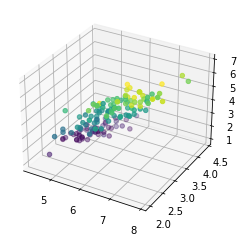

In [11]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_iris[:, 0], X_iris[:, 1], X_iris[:, 2], c=X_iris[:, 3])

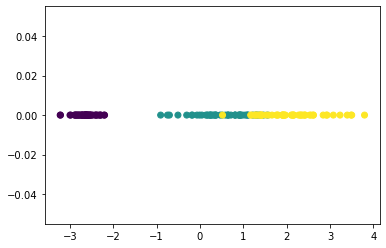

In [12]:
plt.figure()
plt.scatter(X_iris_pca, [0] * len(X_iris_pca), c=y_iris)

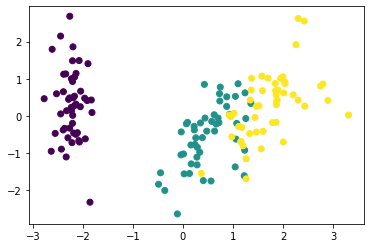

In [13]:
plt.figure()
plt.scatter(X_iris_pca_scaled[:, 0], X_iris_pca_scaled[:, 1], c=y_iris)